<a href="https://colab.research.google.com/github/ismailehasan1/Portfolio-Project---Data-Science---Python/blob/main/Twitter_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis**

Sentiment analysis, also known as opinion mining, is a technique in natural language processing (NLP) that aims to identify and interpret the emotional tone within a piece of text. It’s widely used by organizations to gauge public opinion or customer feedback on products, services, or ideas. By applying data mining, machine learning, and artificial intelligence (AI), sentiment analysis systems can automatically analyze large volumes of unstructured text data.

These systems are valuable for extracting insights from a variety of online sources, such as social media, emails, reviews, blog posts, customer support tickets, and forum comments. Instead of relying on manual analysis, sentiment analysis uses algorithms that work through different approaches: rule-based systems, machine learning models, or a hybrid of both. Rule-based systems rely on predefined rules and lexicons to determine sentiment, while machine learning models "learn" from data to detect patterns in language. Hybrid systems combine both methods to improve accuracy and flexibility.

In addition to identifying whether the sentiment is positive, negative, or neutral, sentiment analysis can also determine the intensity of the sentiment (polarity), the subject being discussed, and the person expressing the opinion. The analysis can be performed at various levels, including the document, paragraph, sentence, or even sub-sentence level.

Types of Sentiment Analysis
- Fine-grained Sentiment Analysis
This approach provides a more detailed breakdown of sentiment, going beyond simple positive or negative categories. For example, it can distinguish between very positive, neutral, or very negative sentiment, similar to a 5-star rating system.

- Emotion Detection
Rather than just identifying whether sentiment is positive or negative, emotion detection categorizes specific emotions such as joy, anger, sadness, surprise, or frustration.

- Intent-based Sentiment Analysis
This type of analysis focuses not only on the sentiment but also on the intent or action behind the text. For example, if a customer expresses frustration about a product issue, intent-based analysis might signal the need for customer service intervention to address the problem.

- Aspect-based Sentiment Analysis
Aspect-based analysis looks at specific aspects or features of a product or service being discussed. For example, a customer might leave a negative review about a smartphone's short battery life, but the sentiment is directed only at the battery, not the entire product. This analysis helps identify which features customers like or dislike.

In summary, sentiment analysis helps businesses understand customer feelings and opinions, enabling them to make data-driven decisions, improve customer satisfaction, and enhance overall experiences.

# Reference:
Pang, B., & Lee, L. (2008). Opinion Mining and Sentiment Analysis. Foundations and Trends® in Information Retrieval, 2(1–2), 1–135.
Link to Paper

Liu, B. (2012). Sentiment Analysis and Opinion Mining. Morgan & Claypool Publishers.
This is a comprehensive book that covers sentiment analysis in depth, including techniques and applications.

Cambria, E., & White, B. (2014). Jumping NLP Curves: A Review of Natural Language Processing Research. IEEE Computational Intelligence Magazine, 9(2), 48–57.
Link to Paper

# IMPORT NECESSARY LIBRARIES

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# LOAD DATASETS

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
train_set = '/content/drive/MyDrive/Colab Notebooks/TEXT ANALYSIS/train.csv'

df_train = pd.read_csv(train_set,
                  encoding = "utf-8",
                  engine = "python",
                  header = 0)

In [18]:
test_set = '/content/drive/MyDrive/Colab Notebooks/TEXT ANALYSIS/test.csv'

df_test = pd.read_csv(test_set,
                  encoding = "utf-8",
                  engine = "python",
                  header = 0)

In [19]:
print(colored("\nDATASETS WERE SUCCESFULLY LOADED...", color = "green", attrs = ["dark", "bold"]))


DATASETS WERE SUCCESFULLY LOADED...


# The first five train set

In [20]:
df_train.head(n = 5).style.background_gradient(cmap = "summer")

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


# The first five test set

In [21]:
df_test.head(n = 5).style.background_gradient(cmap = "summer")

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


Shape of the train and test set

In [23]:
print("Train set shape: {} and test set shape: {}".format(df_train.shape, df_test.shape))

Train set shape: (31962, 3) and test set shape: (17197, 2)


See the general information about train set

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Check if there is any duplicate values

In [25]:
print("Totally there are {} duplicated values in train_set".format(df_train.duplicated().sum()))

Totally there are 0 duplicated values in train_set


Get the number of classes of the "label" variable of train set

In [26]:
df_train.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


# CLEAN AND PROCESS DATASET

Convert uppercase letters to lowercase letters in "tweet" columns

In [27]:
df_train["tweet"] = df_train["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_test["tweet"] = df_test["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nCONVERTED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


CONVERTED SUCCESFULLY...


Delete punctuation marks from "tweet" columns

In [28]:
df_train["tweet"] = df_train["tweet"].str.replace('[^\w\s]','')
df_test["tweet"] = df_test["tweet"].str.replace('[^\w\s]','')

print(colored("\nDELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DELETED SUCCESFULLY...


Delete numbers from "tweet" columns

In [29]:
df_train['tweet'] = df_train['tweet'].str.replace('\d','')
df_test['tweet'] = df_test['tweet'].str.replace('\d','')

print(colored("\n NUMBERS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


 NUMBERS DELETED SUCCESFULLY...


Delete stopwords from "tweet" columns

In [30]:
sw = stopwords.words("english")
df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
df_test['tweet'] = df_test['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


STOPWORDS DELETED SUCCESFULLY...


Lemmatization. That is, we get the roots of the words in the "tweet" columns

In [31]:
df_train['tweet'] = df_train['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_test['tweet'] = df_test['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nDONE SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DONE SUCCESFULLY...


Drop "id" column from datasets

In [32]:
df_train = df_train.drop("id", axis = 1)
df_test = df_test.drop("id", axis = 1)

print(colored("\n'ID' COLUMNS DROPPED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


'ID' COLUMNS DROPPED SUCCESFULLY...


Look at the latest condition of train set

In [33]:
df_train.head(n = 10)

,label,tweet
0,0,@user father dysfunctional selfish drag kid dy...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation
5,0,[2/2] huge fan fare big talking leave. chaos p...
6,0,@user camping tomorrow @user @user @user @user...
7,0,next school year year exams.ð¯ can't think ð...
8,0,won!!! love land!!! #allin #cavs #champions #c...
9,0,@user @user welcome ! i'm #gr8 !


In [35]:
df_test.head(n = 10)

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe way heal #acne!! #altwaystoheal #healthy ...
3,"hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."
5,choose :) #momtips
6,something inside dy ð¦ð¿â¨ eye ness #smok...
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,@user @user @user never understand dad left yo...
9,#delicious #food #lovelife #capetown mannaepic...


Divide datasets

In [36]:
x = df_train["tweet"]
y = df_train["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DIVIDED SUCCESFULLY...


# VECTORIZE DATA


Word embeddings, or word vectorization, is a technique in natural language processing (NLP) that converts words or phrases from a vocabulary into corresponding vectors of real numbers. These numerical representations are used to capture semantic relationships between words, enabling tasks such as word prediction, similarity analysis, and semantic understanding.

Count vectors method

In [37]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

TF-IDF" method

In [38]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# BUILD MACHINE LEARNING MODELS

Logistic regression model with "count-vectors" method

In [39]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.9488504114420065


Logistic regression model with "tf-idf" method

In [40]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9305520180250783


XGBoost model with "count-vectors" method

In [41]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'count-vectors' method
Accuracy ratio:  0.9419719827586208


XGBoost model with "tf-idf" method¶

In [42]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.9393118142633228


Light GBM model with "count-vectors" method

In [43]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_count.astype("float64"), train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_count.astype("float64"),
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.269874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4148
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1549
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 383
[LightGBM] [Info] [b

Light GBM model with "tf-idf" method

In [44]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.516239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40275
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1549
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6978
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 383
[LightGBM] [Info] [

ROC AUC (curvature)

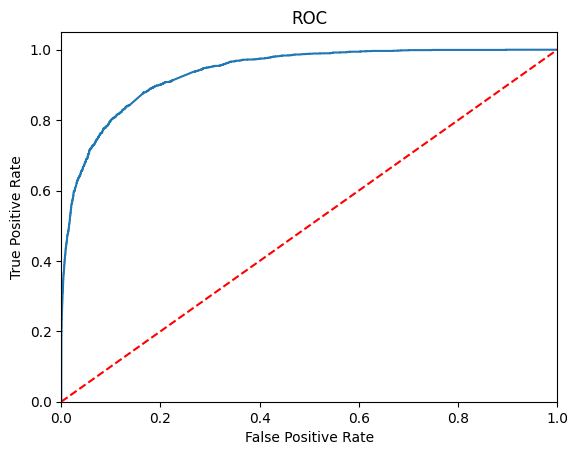

In [45]:
y = train_y
X = x_train_count.astype("float64")

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# ESTIMATION OVER TEST SET

Look at the first 5 rows of the test set

In [49]:
df_test.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe way heal #acne!! #altwaystoheal #healthy ...
3,"hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."


Here we encode values of "tweet" column of test set with "count-vectors" method

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
df_test = vectorizer.transform(df_test["tweet"])
df_test.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
lgbm_model.predict(df_test.astype("float"))[0:5]

array([0, 1, 0, 0, 0])

# VISUALIZATION WITH WORD CLOUD

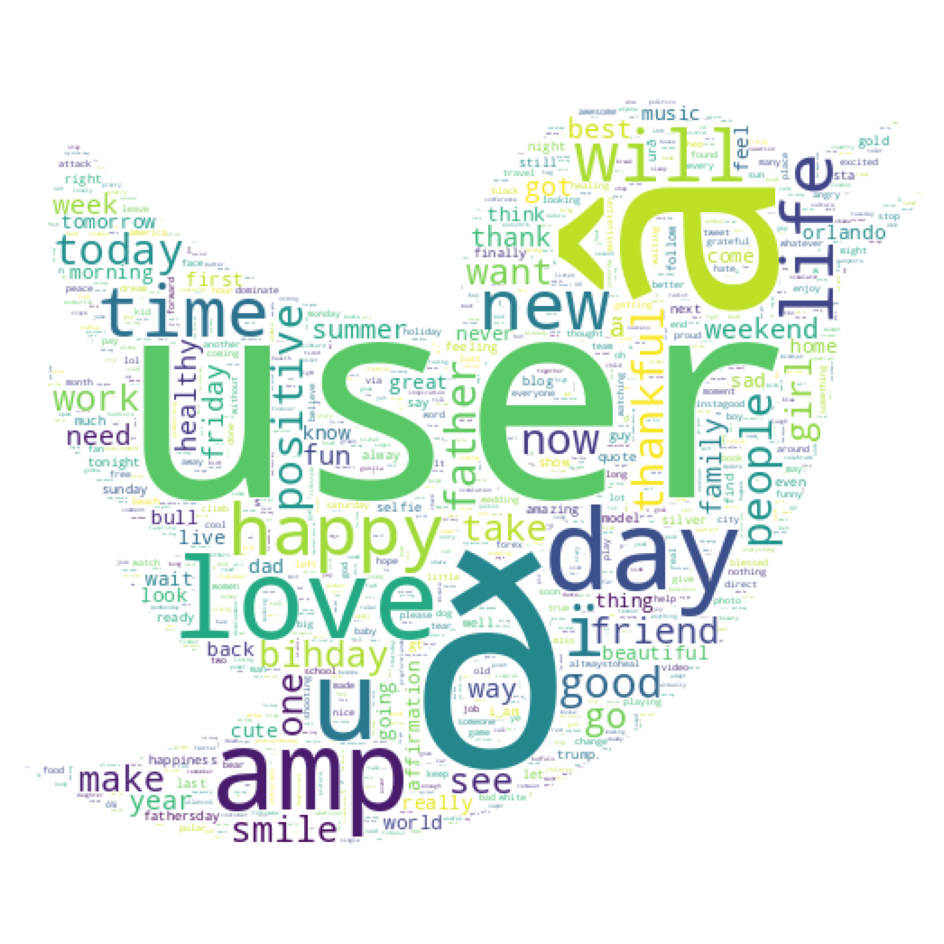

In [61]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

tw_mask = np.array(Image.open('/content/drive/MyDrive/Colab Notebooks/TEXT ANALYSIS/twitter_mask3.jpg'))

text = " ".join(i for i in train_set.tweet)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 12])
plt.imshow(wc)
plt.axis("off")
plt.show;